In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

# Only works on Jupyter/Anaconda
%matplotlib inline  

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
print(boston_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
print(boston_dataset.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston2 = pd.DataFrame(boston_dataset['data'], columns=boston_dataset['feature_names'])
boston2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# create a separate Y value
boston_Y = boston_dataset.target
boston_Y


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

# fit the model to the training data
lin_model_fit = lin_model.fit(boston, boston_Y)

In [10]:
print("Alpha/intercept (a)")
print(lin_model_fit.intercept_)

print("\n")

# print the beta values of the model (co-efficients)
betas = lin_model_fit.coef_
counter = 0
for col in boston.columns:
    if counter == 0:
        print("Beta weights/co-efficients (b1 to b13)")
        print("-----------------------------------------")
    print(col + ": " + str(round(betas[counter], 4)))
    counter +=1

Alpha/intercept (a)
36.45948838508993


Beta weights/co-efficients (b1 to b13)
-----------------------------------------
CRIM: -0.108
ZN: 0.0464
INDUS: 0.0206
CHAS: 2.6867
NOX: -17.7666
RM: 3.8099
AGE: 0.0007
DIS: -1.4756
RAD: 0.306
TAX: -0.0123
PTRATIO: -0.9527
B: 0.0093
LSTAT: -0.5248


In [11]:
boston_predict = lin_model_fit.predict(boston)

# calculate RMSE (root mean square error) and R^2 (predictive power)
from sklearn.metrics import mean_squared_error, r2_score
rmse = (np.sqrt(mean_squared_error(boston_Y, boston_predict)))
r2 = r2_score(boston_Y, boston_predict)

# print the performance metrics
print("Model performance")
print("--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')

Model performance
--------------------------------------
RMSE is 4.679191295697281
R2 score is 0.7406426641094095


In [12]:
boston['MV'] = boston_dataset.target

In [13]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


[]

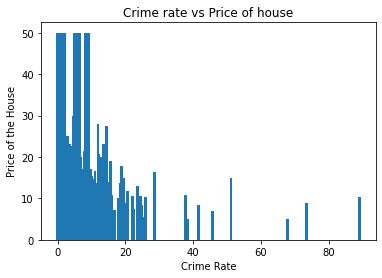

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
plt.bar(boston.CRIM, boston.MV)
plt.xlabel('Crime Rate')
plt.ylabel('Price of the House')
plt.title('Crime rate vs Price of house')
plt.plot()

[]

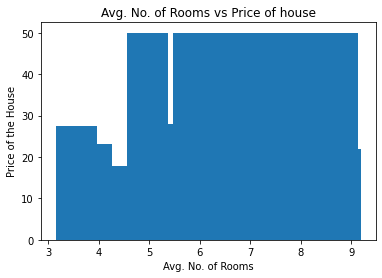

In [15]:
plt.bar(boston.RM, boston.MV)
plt.xlabel('Avg. No. of Rooms')
plt.ylabel('Price of the House')
plt.title('Avg. No. of Rooms vs Price of house')
plt.plot()

<AxesSubplot:>

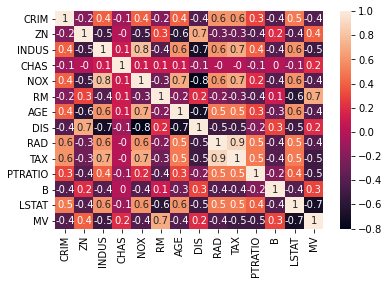

In [16]:
# create a correlation matrix rounding to one decimal point
correlation_matrix = boston.corr().round(1)
# print a correlation heat map
sns.heatmap(data=correlation_matrix, annot=True) #因为线性回归要求因子之间相关度低

In [17]:
import pandas as pd
import numpy as np

# create example dataframe
df = pd.DataFrame({"a": [1,2,3,4,5], "hasPhD?": ["yes", "yes", "no", "no", "no"]})
print(df)

print("\n")

# change "hasPhD? to numerical values"
df["hasPhD?"] = np.where(df["hasPhD?"] == "yes", 1, 0) #np.where非常好用，
print(df)

   a hasPhD?
0  1     yes
1  2     yes
2  3      no
3  4      no
4  5      no


   a  hasPhD?
0  1        1
1  2        1
2  3        0
3  4        0
4  5        0


In [19]:
# generate binary values using get_dummies
df = pd.DataFrame({"a": [1,2,3,4,5], "businessType": ["Hospitality", "IT", "Education", "IT", "Oil"]})
df = pd.get_dummies(df, columns=["businessType"], prefix=["type_"]) #pd.get_dummies非常好用，赋值
df

,a,type__Education,type__Hospitality,type__IT,type__Oil
0,1,0,1,0,0
1,2,0,0,1,0
2,3,1,0,0,0
3,4,0,0,1,0
4,5,0,0,0,1


In [21]:
df = pd.DataFrame({"a": [1,2,3,4,5], "degree": ["MSc eBM", "BA Art", "MSc CSM", "BSc CS", "MSc eBM"]})
df[['degree', 'subject']] = df['degree'].str.split(' ', 1, expand=True) #记住这个用法
df

,a,degree,subject
0,1,MSc,eBM
1,2,BA,Art
2,3,MSc,CSM
3,4,BSc,CS
4,5,MSc,eBM


In [22]:
# DataFrame with missing data
df = pd.DataFrame({"a": [1,2,3,4,None], "hasPhD?": [1, 0, None, 0, 0]})
print(df)
print("\n")

# drop rows with missing data
dfdrop = df.dropna()  #直接删除所有na
print("Drop rows")
print(dfdrop)
print("\n")

# replace NAs with column mean
dfcol = df.fillna(df.mean()) #用mean替代空数据
print("Column mean")
print(dfcol)
print("\n")

# row mean
dfrow = df.apply(lambda row: row.fillna(row.mean()), axis=1)
print("Row mean")
print(dfrow)

     a  hasPhD?
0  1.0      1.0
1  2.0      0.0
2  3.0      NaN
3  4.0      0.0
4  NaN      0.0


Drop rows
     a  hasPhD?
0  1.0      1.0
1  2.0      0.0
3  4.0      0.0


Column mean
     a  hasPhD?
0  1.0     1.00
1  2.0     0.00
2  3.0     0.25
3  4.0     0.00
4  2.5     0.00


Row mean
     a  hasPhD?
0  1.0      1.0
1  2.0      0.0
2  3.0      3.0
3  4.0      0.0
4  0.0      0.0


In [23]:
df = pd.DataFrame({"Team": ["DS", "DT", "DT", "DS", "DS"], "salary": [100000, 100, 20000, 0, 100000]})
print(df)
print("\n")

# team based aggregation (average)
mean_df = df.groupby(['Team']).mean() #groupby后面直接有mean的方法，minmax同理
print("Aggregation by mean")
print(mean_df)
print("\n")

  Team  salary
0   DS  100000
1   DT     100
2   DT   20000
3   DS       0
4   DS  100000


Aggregation by mean
            salary
Team              
DS    66666.666667
DT    10050.000000




In [26]:
def cumlative_counter(a):
    counter = 0
    running_total = 0
    for number in a:
        for value in a[:counter+1]:
            running_total += value
        counter += 1
    print("Cumlative total is " + str(running_total)) 
    return running_total


# testing
a = [1,2,3,4,5]
total = cumlative_counter(a)
print(total)

Cumlative total is 35
35


In [28]:
def cumlative_counter(a):
    counter = 0
    running_total = 0
    s_temp = 0
    total = 0
    for i in range(len(a)):
        s_temp = s_temp + a[i]
        total = total + s_temp
    return total
    


# testing
a = [1,2,3,4,5]
total = cumlative_counter(a)
print(total)

35


In [29]:
# the code from the last work book
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier as DTC

import pandas as pd
import numpy as np

# import the data
data = load_breast_cancer()

# create a DataFrame of features
cancer_df = pd.DataFrame(data.data, columns=data.feature_names)

# normalise the data
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df = scaler.fit_transform(cancer_df)
cancer_df = pd.DataFrame(df, columns=data.feature_names)

# create a target variable
cancer_target = data.target

# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cancer_df, cancer_target, test_size = 0.2)

# fit a decision tree to the training data
tree_model = DTC()
tree_model_fit = tree_model.fit(X_train, Y_train)

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

np.set_printoptions(precision=2)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalise=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          multi=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalise=True`.
    """
    if not title:
        if normalise:
            title = 'Normalised confusion matrix'
        else:
            title = 'Confusion matrix, without normalisation'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    if multi==True:
    	classes = classes[unique_labels(y_true, y_pred)]
    if normalise:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor");

    fmt = '.2f' if normalise else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

<AxesSubplot:title={'center':'Normalised confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

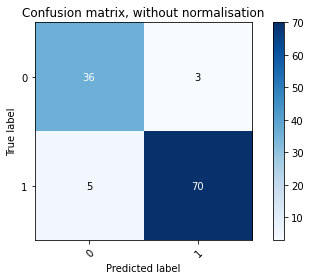

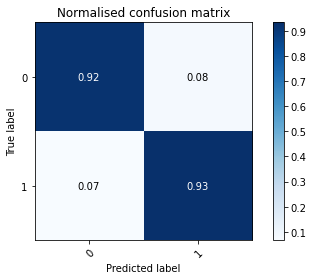

In [31]:
# predict the test data
predicted = tree_model_fit.predict(X_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"], normalise=True)

In [32]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'max_depth': [3, 5, 7],
                     'min_samples_split': [3, 5, 7],
                     'max_features': ["sqrt", "log2", None]}]

scores = ['accuracy', 'f1_macro']

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(DTC(), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters for accuracy


Best parameters set found on the training set:
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 7}


# Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 3}




<AxesSubplot:title={'center':'Normalised confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

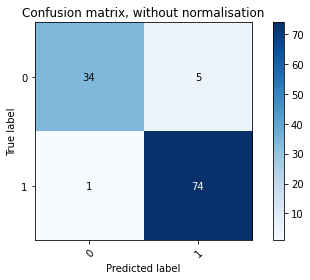

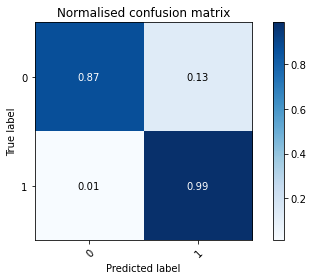

In [34]:
# fit model with new hyperparameters
tree_model = DTC(criterion = 'entropy',max_depth=5, max_features = 'log2', min_samples_split = 7)
tree_model_fit = tree_model.fit(X_train, Y_train)

# predict the test data
predicted = tree_model_fit.predict(X_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1"], normalise=True)

In [35]:
# the code from the last work book
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor as DTR

import pandas as pd
import numpy as np

# import the data
data = load_diabetes()
data

{'data': array([[ 0.04,  0.05,  0.06, ..., -0.  ,  0.02, -0.02],
        [-0.  , -0.04, -0.05, ..., -0.04, -0.07, -0.09],
        [ 0.09,  0.05,  0.04, ..., -0.  ,  0.  , -0.03],
        ...,
        [ 0.04,  0.05, -0.02, ..., -0.01, -0.05,  0.02],
        [-0.05, -0.04,  0.04, ...,  0.03,  0.04, -0.03],
        [-0.05, -0.04, -0.07, ..., -0.04, -0.  ,  0.  ]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
        128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
        150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
        200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
         42., 111.,  98., 164.,  

In [37]:
df_data = pd.DataFrame(data['data'], columns = data['feature_names'])

In [38]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df = scaler.fit_transform(cancerdf)
cancer_df = pd.DataFrame(df, columns=data.feature_names)
df_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [39]:
target = data.target
target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [43]:
len(target)

442

In [45]:
df_data.index

RangeIndex(start=0, stop=442, step=1)

In [47]:
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_data, target, test_size = 0.2)
Y_train

array([ 68., 200., 259., 292.,  90., 145.,  73., 151., 270.,  99.,  71.,
       268., 103., 235.,  55., 185., 220., 201., 283., 125.,  25., 263.,
       132., 210., 275., 274., 219.,  65., 144., 200., 109., 252., 288.,
       243.,  64., 150.,  59.,  39., 261., 249., 209., 155., 212.,  48.,
        94., 115., 232., 103., 199., 166., 120., 174., 258., 160., 122.,
       332., 173.,  42.,  48., 217., 233., 114., 174., 259.,  61.,  78.,
       230.,  74., 202., 202., 101., 164., 146., 111., 220.,  74., 293.,
       275., 310., 111.,  47., 178., 195.,  94., 308.,  55., 107., 170.,
       132., 341., 243.,  88.,  89., 246., 279., 144.,  83., 281., 244.,
       172.,  53., 148., 109., 135., 206.,  87., 311., 262.,  71.,  51.,
       186., 259., 139., 265.,  97.,  72., 155., 164., 101., 296., 292.,
       121.,  77.,  72., 230.,  84.,  97.,  51., 178., 108.,  54., 151.,
       113., 233.,  59., 161.,  84.,  75., 138., 111., 139., 141.,  69.,
       272.,  49.,  71., 310., 258., 317., 258., 24

In [50]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
20,-0.049105,-0.044642,-0.056863,-0.043542,-0.045599,-0.043276,0.000779,-0.039493,-0.011901,0.015491
279,0.038076,0.050680,-0.024529,0.004658,-0.026336,-0.026366,0.015505,-0.039493,-0.015998,-0.025930
232,0.012648,0.050680,0.000261,-0.011409,0.039710,0.057245,-0.039719,0.056081,0.024053,0.032059
152,-0.034575,0.050680,-0.000817,0.070073,0.039710,0.066952,-0.065491,0.108111,0.026714,0.073480
358,-0.020045,-0.044642,-0.084886,-0.026328,-0.035968,-0.034194,0.041277,-0.051671,-0.082381,-0.046641
...,...,...,...,...,...,...,...,...,...,...
355,-0.074533,0.050680,-0.009439,0.014987,-0.037344,-0.021669,-0.013948,-0.002592,-0.033249,0.011349
386,0.019913,-0.044642,-0.040696,-0.015999,-0.008449,-0.017598,0.052322,-0.039493,-0.030751,0.003064
216,0.012648,0.050680,0.035829,0.049415,0.053469,0.074155,-0.069172,0.145012,0.045601,0.048628
183,0.045341,0.050680,-0.035307,0.063187,-0.004321,-0.001627,-0.010266,-0.002592,0.015567,0.056912


In [54]:
tree_model = DTR()
tree_model_fit = tree_model.fit(X_train, Y_train) #为什么不能 DTR.fit()

In [64]:
predicted = tree_model_fit.predict(X_test)
score = tree_model_fit.score(X_test,Y_test)
score #overfitting

-0.6928006010591905

In [102]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['mse', 'mae'],
                     'max_depth': [2, 3, 4, 5],
                     'min_samples_split': [5, 7, 9, 11, 13, 15],
                     'max_features': ["sqrt", "log2", None]}] #

scores = ['neg_mean_squared_error', 'r2']

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(DTR(), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters for neg_mean_squared_error


Best parameters set found on the training set:
{'criterion': 'mse', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 7}


# Tuning hyperparameters for r2


Best parameters set found on the training set:
{'criterion': 'mse', 'max_depth': 4, 'max_features': 'log2', 'min_samples_split': 15}




In [70]:
tree_model_fit.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [71]:
tree_model_fit.get_depth()

19

In [113]:
tree_model = DTR(max_depth=4, max_features = 'log2', min_samples_split = 15)
tree_model_fit = tree_model.fit(X_train, Y_train)
score = tree_model_fit.score(X_test,Y_test)
score

0.3071779549060114

In [115]:
tree_model = DTR(max_depth=3, max_features = 'sqrt', min_samples_split = 7)
tree_model_fit = tree_model.fit(X_train, Y_train)
score = tree_model_fit.score(X_test,Y_test)
score #r2确实会变化，说明决策树不适合这个任务

0.30549368131471943

In [ ]:
for